# A Exploratory Data Analysis on Video Games 

Video Games have been around for many years now and have been very popular with people when it comes to entertainment, but how popular are they? And how much money does it make around the World? We will be doing a Exploratory Data Analysis on video games and see many different features of video games such as the sales made from video games, how many video games were made, the different types of video games and more. We will be using a dataset from Kaggle, A website where you can get datasets from and will be using libraries in python to download, clean, explore, visualize and answer question we have about the dataset

## Downloading the Dataset

The dataset that we will be using is from kaggle. kaggle is a place to get datasets and much more.

In [114]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [115]:
# set the dataset_url to the link where the dataset is located
dataset_url = 'https://www.kaggle.com/datasets/gregorut/videogamesales' 

In [116]:
#to use this you need to have a kaggle profile and a api key 
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./videogamesales" (use force=True to force download)


The dataset has been downloaded and extracted.

In [117]:
# set data_dir to where the file is downloaded to 
data_dir = './videogamesales'

In [118]:
import os
os.listdir(data_dir)

['vgsales.csv']

Let us save and upload our work to Jovian before continuing.

In [1]:
project_name = "course-project-videogames" 

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian

In [ ]:
jovian.commit(project=project_name, files=["./videogamesales/vgsales.csv"])

<IPython.core.display.Javascript object>

## Data Preparation and Cleaning

Before we do any kind of analysis on a dataset, we will first have to make sure the dataset is in the right format and cleaned for doing anything else.


In [123]:
#import libraries used for data prep and cleaning
import pandas as pd
import numpy as np

In [124]:
#read the dataset downloaded
vg_df = pd.read_csv('./videogamesales/vgsales.csv')
vg_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


This is a look at the first 5 samples in the dataset to see the format. Some things we can see are the top 5 videogames made and information about each one. The sales of each video game are in the millions.

In [125]:
#get information on the dataset to see the total entries and dtypes in the dataset 
vg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [126]:
#see if there are missing values
vg_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

We check to see if there are any missing values in our dataset.

In [127]:
#fix the missing values by replacing the null values in publisher to "Unknown"
#and replace the games with unknown years with -1 
vg_df["Publisher"] = vg_df["Publisher"].replace(np.nan, "Unknown")
vg_df["Year"] = vg_df["Year"].replace(np.nan, -1)

Because the "Year" and "Publisher" columns have missing values, lets replace the "Publisher" missing values with "Unknown" and the "Year" values with -1. Another way of handling the values is to drop the video game rows that have missing values.

In [128]:
vg_df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

There are no missing values now in the dataset.

In [129]:
vg_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In the Year column we have a float for the year which is not needed. We will change the type so it does not have a decimal point

In [130]:
#convert the year column to non float 
vg_df["Year"] = vg_df["Year"].astype(np.int64)

Now we will look at the dataframe to make sure the years were changed to the right format we want. 

In [131]:
vg_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [132]:
#check to see if theres any duplicates 
vg_df.duplicated().sum()

0

Another thing to check is to see if there are any duplicated rows just incase there is a copy of a videogame with all the same features which could effect doing aggregates on the dataset.

## Exploratory Analysis and Visualization

Now that we did a very brief cleaning and preparation of the dataset, now we can perform a Exploratory Analysis and Visualization. What we will be doing is analyzing the dataset to find information on videogame Platforms, Genres, Publishers and Sales. we will be visualizing all the interesting things about each one instead of just looking at numbers. 



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [133]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Top Platforms that has the most games 

What would be interesting to look as is the top 5 platforms that have the most games and compare them 

In [134]:
#used for getting the amount of games made on every platform from the dataset
platform_s = vg_df["Platform"].value_counts()

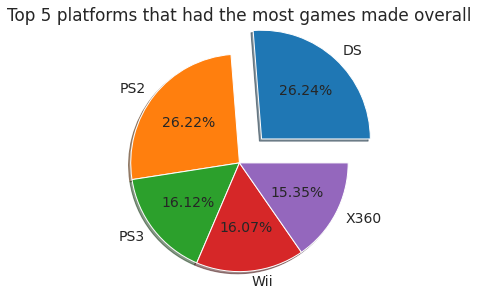

In [135]:
#we get the index of the first 5 names set them to the labels and the values set them to x
plt.pie(labels=platform_s.index[:5], x=platform_s.values[:5], 
                                     autopct="%.2f%%", 
                                     explode=[0.3, 0, 0, 0, 0], 
                                     shadow=True );

plt.title("Top 5 platforms that had the most games made overall");

As we can see the Nintendo DS and PlayStation 2 are very close to having the most games made while the Play Station 3, Wii and Xbox360 are close to having the second most games made on their platforms. But as time continues, that may change.

### Games made in genres

Another cool visual to look at is how many games were made in each genre

In [136]:
#get how many games are in each genre 
genre_s = vg_df["Genre"].value_counts()

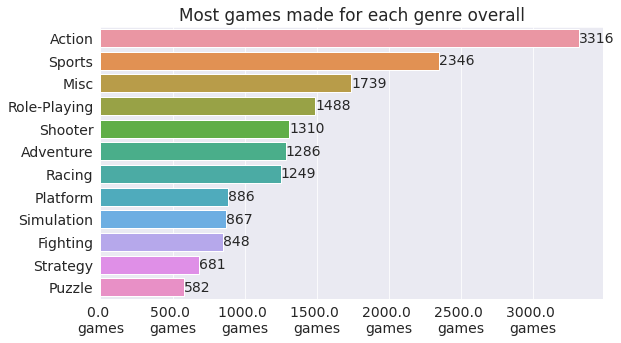

In [137]:
genre_plot = sns.barplot(x=genre_s.values, y=genre_s.index)

#this block of code takes each bar and labels the number of games for a more specific bar
for c in genre_plot.containers:
    genre_plot.bar_label(c)

#add the games to each x tick
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: "{} \ngames".format(x)))

plt.title("Most games made for each genre overall");

It seems that there are not that many Puzzle and Strategy games made. Meanwhile Action and Sports games are a very popular game to make compared to Puzzle and Strategy. Maybe the reason why there are not many Puzzle and Strategy games being made is because it takes alot more time and effort to make.

### PlayStation 4 vs Xbox One

During 2013, the next gen consoles PS4 and Xbox One was gaining alot of attraction on the media on determining what console was going to be the best one to play video games on and it was a really big deal. Lets look at the sales of video games made from the two consoles from our dataset.

In [138]:
#group the "Platform" and "Year" columns and get the total global sales from xbox one, ps4 and pc
#using the parentheses is called piping so we can make the dot chaining cleaner
next_gen_df = (vg_df.groupby(["Platform", "Year"])["Global_Sales"].sum()
                                                               .loc[["XOne", "PS4", "PC"]]
                                                               .reset_index()
)
#get the sales from 2013 to 2016 
next_gen_df = next_gen[(next_gen["Year"] > 2012) & (next_gen["Year"] < 2017)]

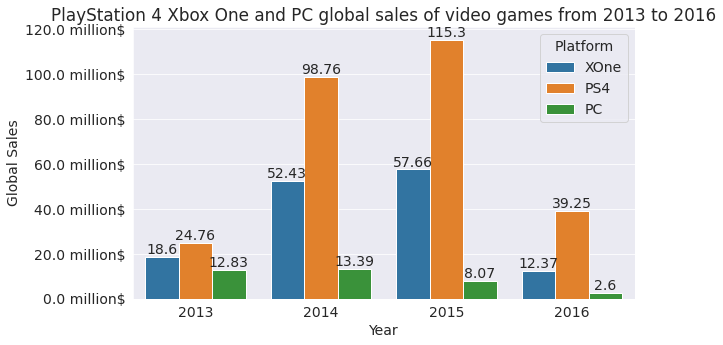

In [139]:
psxopc = sns.barplot(data=next_gen_df, x="Year", y="Global_Sales", hue="Platform")

for c in psxopc.containers:
    psxopc.bar_label(c)

#this line takes the y axis ticks and formats it to add the unit (million$) to the number 
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: "{} million$".format(x)))

plt.ylabel("Global Sales")
plt.title("PlayStation 4 Xbox One and PC global sales of video games from 2013 to 2016");

I added PC to the plot to compare the sales of the two next gen consoles. As we can see when the next gen consoles were released first were released, the PlayStation 4 and Xbox One was close together. The Xbox One was off by 6.16 million dollars compared to the PS4. From 2013 to 2014, Xbox One had no chance with how much the PlayStation 4 was making from the video games as the PS4 nearly tripled its sales within the year. The year 2015 was when the next gen consoles made the most sales. The year 2016 seems like the sales started to decline tremendously and possibly with the popularity compared to 2015

One more thing to look at is what video game in the PlayStation 4 and Xbox one was the most popular in 2015

In [140]:
game_sales = vg_df[(vg_df["Year"] == 2015) & (vg_df["Platform"] == "PS4") | (vg_df["Platform"] == "XOne")]
game_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
77,78,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
92,93,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
101,102,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4.52,2.09,0.01,0.67,7.30
109,110,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96


In 2015, Call of Duty: Black Ops 3 was the most popular game on both consoles in 2015. One thing to note is that the global sales from the video game was very different as the PS4 version made almost double of what Xbox One made on that video game

### Publisher Sales from the two major areas in 2015

From the last visual, we saw that the year 2015 was when the next gen consoles made the most dollars from video games. Lets take a look at the top 5 publishers that made the most sales in North America and in the European Union. We will look at the NA video game sales first.

In [141]:
#taking the publishers and years and summing the sales in NA 
publisher_sales_df_na = vg_df.groupby(["Publisher", "Year"])["NA_Sales"].sum().reset_index()

#filtering out all the years except 2015 and the top 5 Publishers that made the most sales
publisher_sales_df_na = publisher_sales_df_na[publisher_sales_df_na["Year"] == 2015].sort_values(by=["Year", "NA_Sales"], ascending=False).head()

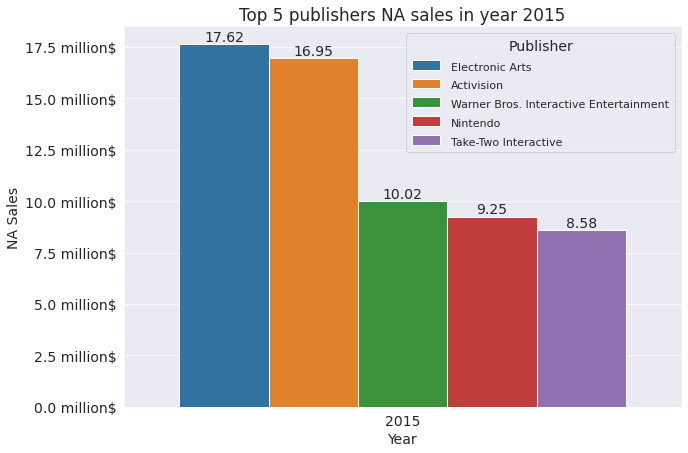

In [142]:
plt.figure(figsize=(10, 7))

nasbp = sns.barplot(data=publisher_sales_df_na.head(), x="Year", y="NA_Sales", hue="Publisher")

#changes the legends position on the graph so it does not overlap the bar graph
plt.setp(nasbp.get_legend().get_texts(), fontsize="11")

for c in nasbp.containers:
    nasbp.bar_label(c)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: "{} million$".format(x)))

plt.title("Top 5 publishers NA sales in year 2015")
plt.ylabel("NA Sales");

Electronic Arts has made the most sales in North America with 17.62 million dollars made and nearly has the combined sales of Nintendo and Take-Two Interactive in NA in the year 2015.

Now lets look at the Publisher sales in the European Union

In [143]:
publisher_sales_df_eu = vg_df.groupby(["Publisher", "Year"])["EU_Sales"].sum().reset_index()
publisher_sales_df_eu = publisher_sales_df_eu[publisher_sales_df_eu["Year"] == 2015].sort_values(by=["EU_Sales"], ascending=False).head()

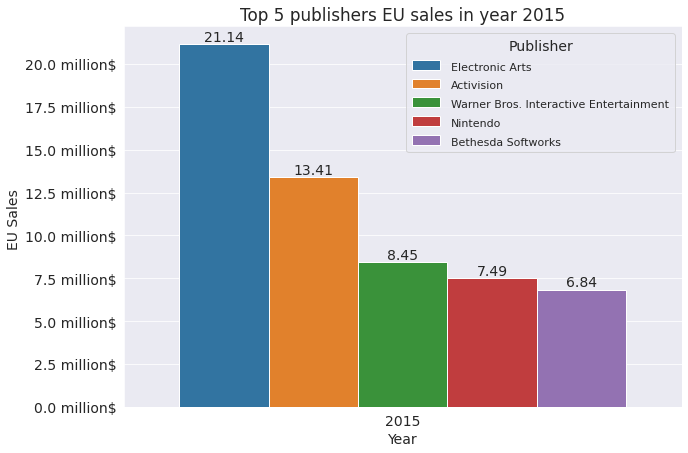

In [144]:
plt.figure(figsize=(10, 7))

eusbp = sns.barplot(data=publisher_sales_df_eu.head(), x="Year", y="EU_Sales", hue="Publisher")

for c in eusbp.containers:
    eusbp.bar_label(c)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: "{} million$".format(x)))

plt.setp(eusbp.get_legend().get_texts(), fontsize="11")

plt.title("Top 5 publishers EU sales in year 2015")
plt.ylabel("EU Sales ");

The Publishers are mostly the same for their rankings in sales from video games. In the 5th position of sales for Publishers Take-Two Interactive was replaced by Bethesda Softworks. But with the sales of each Publisher, there is a difference. One major difference is the sales that Electronic Arts and Activision made. Activision was making less than what they made in NA sales. Electronic arts had an increase of sales by 3.52 million dollars.

### Global Sales of NA, EU and JP from 1980 to 2020

A Trend that I was wanting to look at was the Global sales from each major area from the earliest date to the latest date of video games recored in the dataset.

In [145]:
sales_df = vg_df.groupby("Year")[["NA_Sales", "EU_Sales", "JP_Sales"]].sum().reset_index()

In [146]:
#filtering out the Unknown years in the dataset 
sales_df = sales_df[sales_df["Year"] != -1]

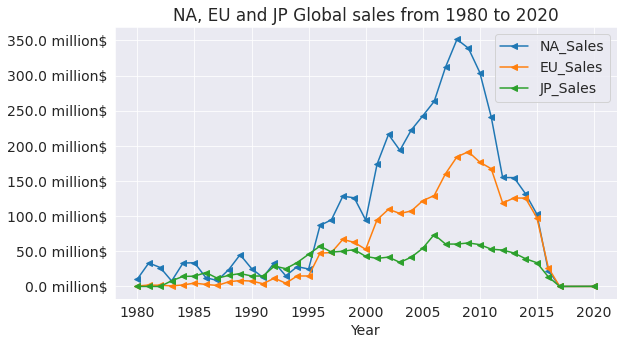

In [147]:
sales_df.plot(x="Year", y=["NA_Sales", "EU_Sales", "JP_Sales"], marker="<")

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: "{} million$".format(x)))

plt.title("NA, EU and JP Global sales from 1980 to 2020");

From 1980 to 1995 all, 3 areas of video game sales were all close together just below 50 million dollars. But from 1995 to 2010, the sales in NA and EU went above 150 million dollars and Japan almost made it to 100 million dollars in sales. 

## Asking and Answering Questions

Now we will be asking some question on the dataset that we visualized above and find the answers to them.

1. What years did each country make the most revenue?
2. What publisher had the most global sales?
3. What year had the most games made?
4. What was the average global sales made on PS4, Xbox One and PC from 2013 to 2016?


### Q1: What years did each major area make the most revenue?

In [148]:
#take the sales dataframe and find the years that made the most $ in millions
most_sales_na = sales_df[sales_df["NA_Sales"] == sales_df["NA_Sales"].max()][["Year", "NA_Sales"]]
most_sales_eu = sales_df[sales_df["EU_Sales"] == sales_df["EU_Sales"].max()][["Year", "EU_Sales"]]
most_sales_jp = sales_df[sales_df["JP_Sales"] == sales_df["JP_Sales"].max()][["Year", "JP_Sales"]]

In [149]:
#display the results
print(f"{most_sales_na.iloc[0, 0]} was the year NA had the most sales of {most_sales_na.iloc[0, 1] * 1000000:,.0f}$")
print(f"{most_sales_eu.iloc[0, 0]} was the year EU had the most sales of {most_sales_eu.iloc[0, 1] * 1000000:,.0f}$")
print(f"{most_sales_jp.iloc[0, 0]} was the year JP had the most sales of {most_sales_jp.iloc[0, 1] * 1000000:,.0f}$")

2008 was the year NA had the most sales of 351,440,000$
2009 was the year EU had the most sales of 191,590,000$
2006 was the year JP had the most sales of 73,730,000$


### Q2: What publisher had the most global sales?

In [150]:
global_sales_pub_df = (vg_df.groupby("Publisher")[["Global_Sales"]]
                            .sum()
                            .sort_values(by=["Global_Sales"], ascending=False)
                            .reset_index()
                            .head()
)

global_sales_pub_df

,Publisher,Global_Sales
0,Nintendo,1786.56
1,Electronic Arts,1110.32
2,Activision,727.46
3,Sony Computer Entertainment,607.50
4,Ubisoft,474.72


We can visualize the dataset to see in a different way the most global sales by publisher

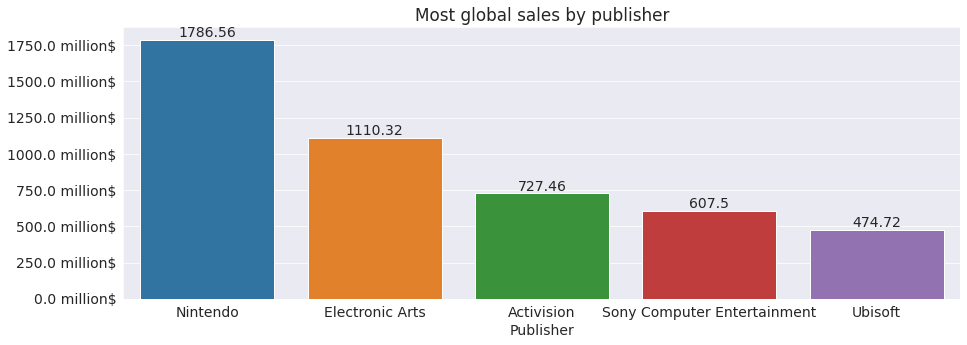

In [151]:
plt.figure(figsize=(15, 5))

pub_sales = sns.barplot(data=global_sales_pub_df, x="Publisher", y="Global_Sales")

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: "{} million$".format(x)))

for c in pub_sales.containers:
    pub_sales.bar_label(c)

plt.ylabel("")
plt.title("Most global sales by publisher");

### Q3: What year had the most games made?

In [152]:
#count all the video games made in each year, sort and display the top 5 years
most_games = vg_df.groupby("Year")["Name"].count().sort_values(ascending=False)[:5]
most_games

Year
2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
Name: Name, dtype: int64

Lets plot the points to see the difference over the years of games being made to have a visual

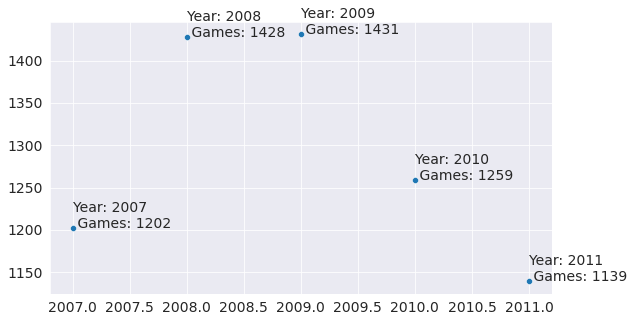

In [153]:
sc = sns.scatterplot(x=most_games.index.values, y=most_games.values)

#adds the "Year" and "Value" label to each point
for i in range(len(most_games)):
    plt.text(most_games.index.values[i], most_games.values[i], 
             f"Year: {most_games.index.values[i]}\n Games: {most_games.values[i]}");

The year 2009 had the most games made with a value of 1431. After that, the amount of games being made started to decline

### Q4: What publisher made the most games?

In [154]:
vg_df.groupby(["Publisher"])["Name"].count().sort_values(ascending=False)[:5]

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
Name: Name, dtype: int64

EA had the most games made overall and the difference between the publisher with the most games made and the publisher next is 376 games

### Q5: What was the average global sales made on PS4, Xbox One and PC from 2013 to 2016

In [155]:
avg_global_df = vg_df.groupby(["Platform", "Year"])["Global_Sales"].sum()

#filter ps4 xbox one and pc out of the global sales platform 
avg_global_df = avg_global_df[["PC", "XOne", "PS4"]].reset_index()

#get the global sales from 2013 to 2016
avg_global_df = avg_global_df[(avg_global_df["Year"] > 2012) & (avg_global_df["Year"] < 2017)]

#get the average global sales 
avg_global_df = avg_global_df.groupby("Platform")["Global_Sales"].mean().reset_index()


In [156]:
print("the average global sales of video games for {} from 2013 to 2016 were {:.2f} million $".format(avg_global_df.iloc[0, 0], avg_global_df.iloc[0, 1]))
print("the average global sales of video games for {} from 2013 to 2016 were {:.2f} million $".format(avg_global_df.iloc[1, 0], avg_global_df.iloc[1, 1]))
print("the average global sales of video games for {} from 2013 to 2016 were {:.2f} million $".format(avg_global_df.iloc[2, 0], avg_global_df.iloc[2, 1]))

the average global sales of video games for PC from 2013 to 2016 were 9.22 million $
the average global sales of video games for PS4 from 2013 to 2016 were 69.52 million $
the average global sales of video games for XOne from 2013 to 2016 were 35.27 million $


## Inferences and Conclusion

### Inferences
From this dataset we found:
- The Nintendo DS has the most video games made.
- The most video games made in the genres of video games was action video games.
- When the next gen consoles were released PS4 was more popular than Xbox One in video game sales and the most popular game from the 2 consoles was Call of Duty Black ops 3. 
- Electronic Arts was the publisher that made the most sales in 2015. 
- In NA and EU. NA Sales of video games was the biggest out of NA, EU and JP. 
- The year with the most sales of video games  in NA was 2008 with 351,440,000 dollars, EU had the the most sales of video games in 2009 with 191,590,00 dollars and JP had the most sales in 2006 with 73,730,00 dollars made. 
- Nintendo overall, had the most global sales for their video games of 1.8B dollars. 
- In the year 2009, 1431 video games were made and was the most video games made out of all the years. 
- Electronic Arts made 1351 video games, the most video games made by a Publisher.
- On average, global sales made from PC from 2013 to 2016 were 9.22 million dollars, global sales made from the PS4 from 2013 to 2016 were 69.52 million dollars and global sales made from Xbox One from 2013 to 2016 were 35.27 million dollars

### Conclusion
In Conclusion, Video games are very popular and made Billions of dollars. they also provide entertainment in many different genres for many people around the world.

## References and Future Work

### References

- [Numpy](numpy.org/doc/stable/): Information on computing numerical values and much more
- [Pandas](pandas.pydata.org/docs/): Information on how to manipulate tabular data
- [Matplotlib](matplotlib.org/stable/api/index) : Information how how to plot data in any kind of way you can think of 

### Future Work
One future idea I have with this dataset is to make a content based recommender system to reccomend a video game to someone based off of the genres of video games they like given a profile of their liked videogames.

In [37]:
import jovian

In [ ]:
jovian.commit(project=project_name, files=["./videogamesales/vgsales.csv"])

<IPython.core.display.Javascript object>